In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from brokenaxes import brokenaxes
import pickle

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


## config 1 (for now just testing)

In [18]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/smf_simulations'
real_vals = [7e-4, -2]
piv = 100

folders = [
    f'{path}/test_data_normal_new/test_fit_better',
    f'{path}/test_data_normal_new_small_K/test_fit',
    f'{path}/test_data_normal_new/spimodfit',
    f'{path}/test_data_normal_new_small_K/spimodfit',
    f'{path}/test_data_normal_new/spimodfit_wo_low_energy',
    f'{path}/test_data_normal_new_small_K/spimodfit_wo_low_energy',

]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]



names = [
    'Pyspi; $K_1$',
    'Pyspi; $K_2$',
    'Spimodfit; $K_1$',
    'Spimodfit; $K_2$',
    'Spimodfit; $K_1$; no low energy',
    'Spimodfit; $K_2$; no low energy',
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    10,
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}" for i in range(len(folders))]

edgecolors = [
    "C0",
    "C1",
    "C0",
    "C1",
    "C2",
    
    "C3",
    "C4",
    "C4"
]
linestyles = [
    "solid",
    "solid",
    #"solid",
    "dashed",
    "dashed",
    'dotted',
    "dotted",
    "dashed",
    "dotted",
]


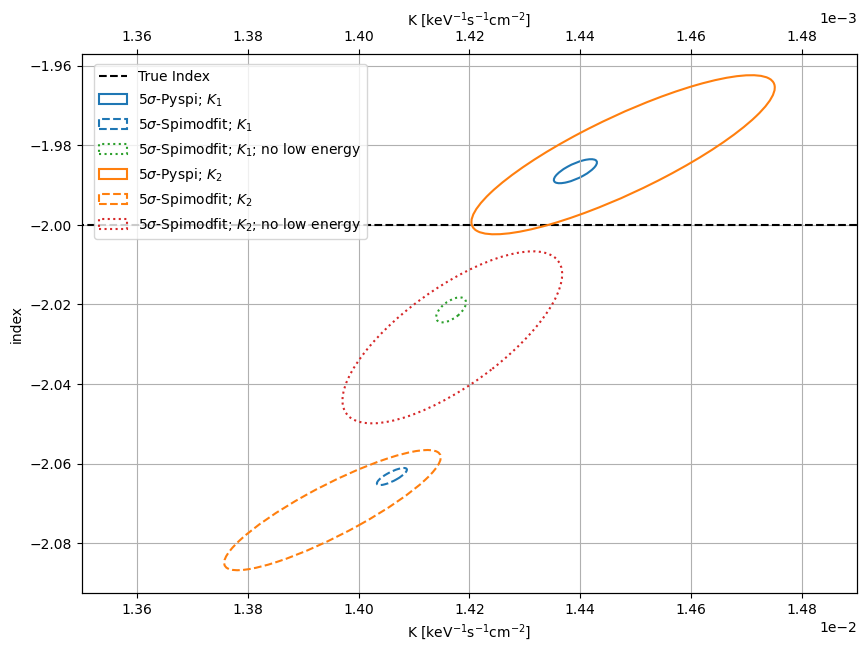

In [21]:
import math
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 7))
ax2 = ax.twiny()

ax.plot((1.2e-2, 1.6e-2),(-2, -2), "k--", label="True Index")

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    if "small_K" in folder:
        confidence_ellipse(val, cov, ax2, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)
    else:
        confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle, linewidth=1.5)
# ax.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax2.autoscale()
ax.autoscale()
ax.set_xlim(1.35e-2, 1.49e-2)
ax2.set_xlim(1.35e-3, 1.49e-3)
ax.grid()


# fig.legend(loc='upper right', bbox_to_anchor=(1.1,0.89), ncol=1)
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.875), ncol=1)
#plt.legend()
ax.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax2.set_xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
ax.set_ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



In [15]:
fig.savefig(f"{path}/comparison_combined_plot.pdf", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[None, None]

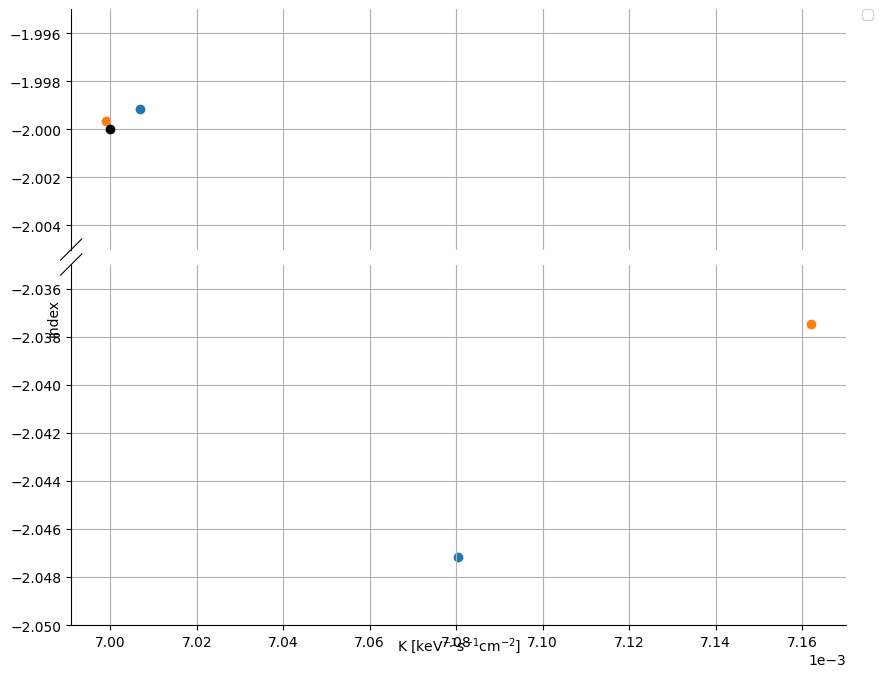

In [9]:
import math

fig = plt.figure(figsize=(10, 8))
bax = brokenaxes(ylims=((-2.05, -2.035),(-2.005,-1.995)), hspace=.05)

for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    bax.scatter(val[0], val[1], label=name, c=edgecolor)
    #confidence_ellipse(val, cov, bax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
bax.plot(real_vals[0], real_vals[1], "ko", label="True Values")
#bax.autoscale()
bax.grid()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
bax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# For the 100x brighter source

In [11]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/sim_source_real_bkg/'
real_vals_para3 = [7e-2, -2]
piv = 100



# here the 'optimised' values acctually perform worse... so they are omitted
folders2 = [
    f'{path}/bright_100_new/0374/pre_ppc',
    f'{path}/bright_100_reduced_bkg_10_new/0374/pre_ppc',
    f'{path}/bright_100_new/0374/spimodfit',
    f'{path}/bright_100_reduced_bkg_10_new/0374/spimodfit',
    f'{path}/bright_100_new/0374/spimodfit_tests',
    f'{path}/bright_100_reduced_bkg_10_new/0374/spimodfit_high_energie',
    f"{path}/bright_100_small_bins_2/0374/spimodfit",

]

names2 = [
    "Bright source 100, normal background",
    "Bright source 100, reduced background",
    "Bright source 100, normal background Spimodfit",
    "Bright source 100, reduced background Spimodfit",
    "Bright source 100, normal background Spimodfit high Energy",
    "Bright source 100, reduced background Spimodfit high Energy",
    "Bright source 100, normal background Spimodfit small bins",
]

edgecolors = [
    "C0",
    "C1",
    "C0",
    "C1",
    "C3",
    
    "C2",
    "C4",
    "purple",
]
linestyles = [
    "solid",
    "solid",
    #"solid",
    "dotted",
    "dotted",
    "dashed",
    "dashed",
    "dotted",
]

d_M_2 = []
for i in range(len(folders2)):
    with open(f"{folders2[i]}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
        print(val, cov)
    d_M_2.append(mahalanobis_dist(val, cov, real_vals_para3))

std_devs2 = [
    10,
    10,
    20,
    20,
    20,
    20,
    20,
]

names2 = [f"{std_devs2[i]}$\\sigma$-{names2[i]}: $d_M$ = {d_M_2[i]:.3f}" for i in range(len(d_M_2))]

#names2 = [f"{names2[i]}: $d_M$ = {d_M_2[i]:.3f}" for i in range(len(d_M_2))]


[ 0.06999246 -1.99996555] [[1.76065934e-10 1.81940244e-09]
 [1.81940244e-09 4.65069660e-08]]
[ 0.07000332 -2.00005632] [[1.18682277e-10 1.03148122e-09]
 [1.03148122e-09 3.33651751e-08]]
[ 0.07161316 -2.03773176] [[7.95243798e-11 8.95022894e-10]
 [8.95022894e-10 2.10303405e-08]]
[ 0.07223549 -2.02829056] [[5.17753114e-11 5.12879594e-10]
 [5.12879594e-10 1.46263326e-08]]
[ 0.07138989 -1.99481008] [[8.32452987e-11 1.95759896e-10]
 [1.95759896e-10 7.36190060e-08]]
[ 0.07178278 -1.99649308] [[5.54782226e-11 1.64485790e-10]
 [1.64485790e-10 3.63616412e-08]]
[ 0.07355878 -2.02949807] [[7.97895347e-11 8.75504962e-10]
 [8.75504962e-10 1.94592339e-08]]


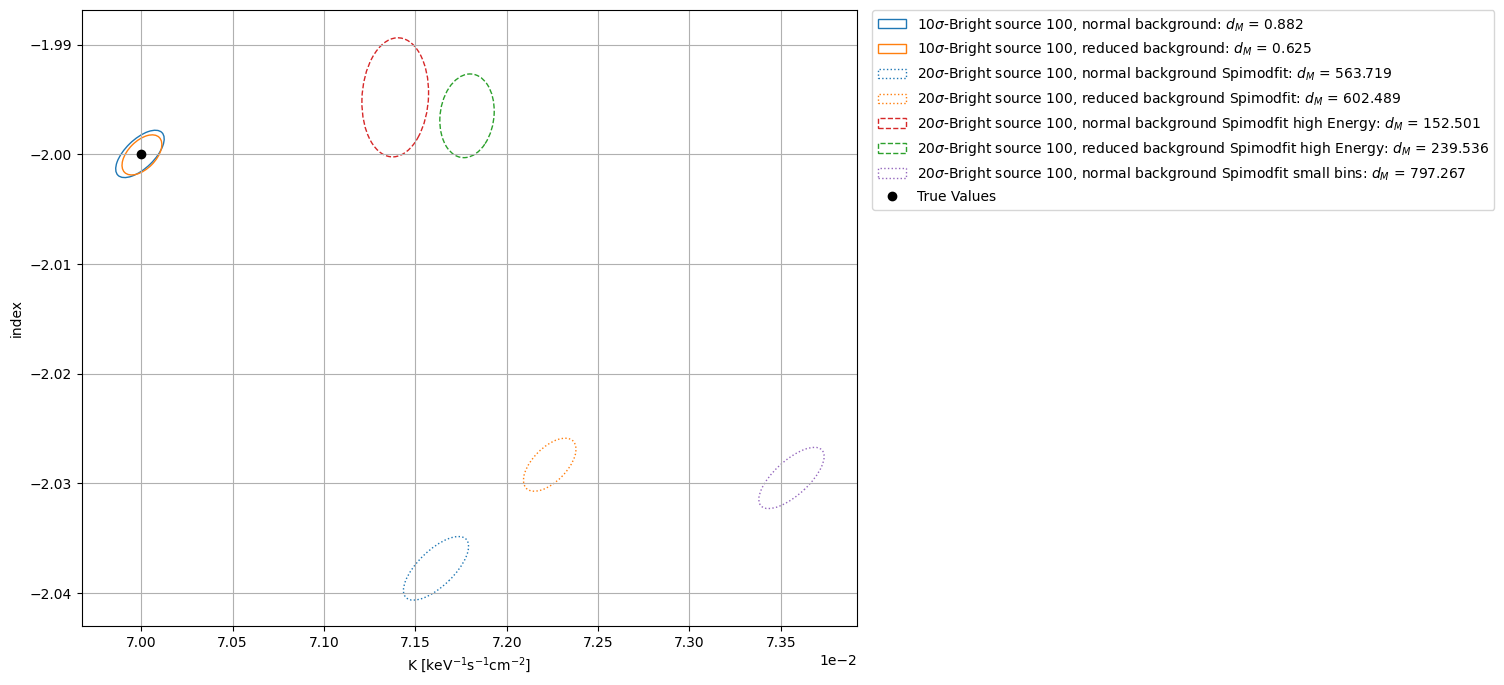

In [12]:
import math

fig, ax = plt.subplots(figsize=(10, 8))
for folder, name, edgecolor, linestyle, std_dev in zip(folders2, names2, edgecolors, linestyles, std_devs2):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals_para3[0], real_vals_para3[1], "ko", label="True Values")
ax.autoscale()
ax.grid()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [13]:
fig.savefig(f"{path}/source_100_comparison_combined_plot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig(f"{path}/spimodfit_comparison_Timm2_Crab_like.pdf", bbox_inches='tight')